# Outline of the session. What will we learn?

This is an introductory session, where we learn the basics of the tools that we will use in the following sessions.

- Astropy Main ingredients: units and constants
- Astropy coordinates
- Astroquery: Vizier queries
- Simple Gaia queries

# Astropy Main ingredients

In [1]:
import numpy as np
from astropy import units as u

In [2]:
d = 42.0 * u.meter  
d

<Quantity 42. m>

In [3]:
type(d)

astropy.units.quantity.Quantity

In [4]:
print(d.value)
print(d.unit)

42.0
m


In [5]:
a = [30,60,90]*u.deg
a

<Quantity [30., 60., 90.] deg>

In [6]:
t = np.arange(10)*u.h
t

<Quantity [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.] h>

### Operations with Quantities

In [7]:
d + 15*u.cm

<Quantity 42.15 m>

In [8]:
a + 15*u.arcmin

<Quantity [30.25, 60.25, 90.25] deg>

In [9]:
t + 525*u.second

<Quantity [0.14583333, 1.14583333, 2.14583333, 3.14583333, 4.14583333,
           5.14583333, 6.14583333, 7.14583333, 8.14583333, 9.14583333] h>

### Unit conversion and operations

The `Quantity` objects have a method to convert to any units available in astropy: `.to()`, which accepts the name of the unit as a string. 

In [10]:
d.to('km')

<Quantity 0.042 km>

In [11]:
d.to(u.km)

<Quantity 0.042 km>

In [12]:
a.to('milliarcsecond')

<Quantity [1.08e+08, 2.16e+08, 3.24e+08] marcsec>

astropy understands a large variety of units. You can find all units available and their name aliases in [module-astropy.units](https://docs.astropy.org/en/stable/units/index.html#module-astropy.units).

In [13]:
100*u.km/(t + 1*u.min)

<Quantity [6000.        ,   98.36065574,   49.58677686,   33.14917127,
             24.89626556,   19.93355482,   16.62049861,   14.25178147,
             12.47401247,   11.09057301] km / h>

In [14]:
v = 100 * u.meter / u.second
v

<Quantity 100. m / s>

In [15]:
v.to(u.km/u.day)

<Quantity 8640. km / d>

In [16]:
v.to(u.pc/u.yr)

<Quantity 1.02271217e-07 pc / yr>

### Other operations
We can also apply more complex functions, for example any of the `numpy` statistical functions will work.


In [17]:
np.mean(t)

<Quantity 4.5 h>

In [18]:
angle_deg = 33*u.deg
angle_arcsec = angle_deg.to(u.arcsec)
print(np.cos(angle_deg), angle_deg)
print(np.cos(angle_arcsec), angle_arcsec)

0.838670567945424 33.0 deg
0.838670567945424 118800.0 arcsec


In [19]:
r = np.random.randn(4,4)*u.cm
print(r)
np.min(r).to('m')

[[-0.61849835 -0.16700317  0.41936451 -0.21550595]
 [ 0.11715209 -0.26574587  1.03500584  0.01195184]
 [ 1.29386176 -1.16260988 -0.96345459 -0.35667745]
 [-0.17174191 -0.74708274 -0.67822655  0.52945067]] cm


<Quantity -0.0116261 m>

In [20]:
Emin = 100*u.keV
Emin

<Quantity 100. keV>

In [21]:
Emax = 10*u.MeV
Emax

<Quantity 10. MeV>

In [22]:
Emax/Emin

<Quantity 0.1 MeV / keV>

In [23]:
np.log(Emax/Emin)

<Quantity 4.60517019>

An alternative way to create a `Quantity` object, which is much faster for large datasets

In [24]:
x = u.Quantity(np.arange(10), unit='m')
x

<Quantity [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.] m>

### ⛏ Exercise

Consider the triangle rectangle with angles 90 deg, 40 deg and 50 deg. Create 3 variables `a1`, `a2`, `a3` and assign the three angles in degrees.

Convert each of them to arcmin, arcsec and milliarcsec and assign them to variables `a1_arcmin`, `a2_arcsec` and `a3_mas`, respectively, and print them.

Compute the sum of the three converted angles, `a_sum`. What are the units of this variable?

Verify that the sum is 180 deg by using `a_sum == 180*u.deg`

In [25]:
a1 = 90*u.deg
a2 = 40*u.deg
a3 = 50*u.deg
print(a1, a2, a3)

90.0 deg 40.0 deg 50.0 deg


In [26]:
a1_arcmin = a1.to(u.arcmin)
a2_arcsec = a2.to(u.arcsec)
a3_mas = a3.to(u.mas)
print(a1_arcmin, a2_arcsec, a3_mas)

5400.0 arcmin 144000.0 arcsec 179999999.99999997 mas


In [27]:
a_sum = a1_arcmin + a2_arcsec + a3_mas
a_sum

<Quantity 10800. arcmin>

In [28]:
a_sum == 180*u.deg

True

### Physical constants

In [29]:
from astropy import constants as const
# speed of light
speed_of_light = const.c
speed_of_light

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [30]:
const.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

In [31]:
const.M_sun.to('g')

<Quantity 1.98840987e+33 g>

In [32]:
# distance sun - earth
distance_sun = 1 * u.au

# time
time_sun = distance_sun / speed_of_light
time_sun

<Quantity 3.33564095e-09 AU s / m>

In [33]:
time_sun.to('min')

<Quantity 8.3167464 min>

In [34]:
print(f"SI: {distance_sun.si}")
print(f"CGS: {distance_sun.cgs}")

SI: 149597870700.0 m
CGS: 14959787070000.0 cm


### ⛏ Exercise
Assuming that the distance to the Galactic Center is 8 kpc, compute the time it takes for light to travel from the Galactic Center to the Earth, in years.

In [35]:
# distance to GC
distance_gc = 8 * u.kpc

# time
time_gc = distance_gc / speed_of_light
time_gc.to(u.yr)

<Quantity 26092.51021734 yr>

# Astropy Coordinates

In [36]:
from astropy.coordinates import Angle

Angle(24*u.deg)

<Angle 24. deg>

In [37]:
a = Angle(1*u.deg)
print(a.deg)
print(a.arcmin)
print(a.arcsec)

1.0
60.0
3600.0


In [38]:
angles = Angle([1, 4, 6, 15, -3, 2, 10, 2, 0]*u.deg)
angles

<Angle [ 1.,  4.,  6., 15., -3.,  2., 10.,  2.,  0.] deg>

In [39]:
angles.to('arcmin')

<Angle [  60.,  240.,  360.,  900., -180.,  120.,  600.,  120.,    0.] arcmin>

In [40]:
angles.sort()  # The variable angles will be modified insitu.
angles.arcmin

array([-180.,    0.,   60.,  120.,  120.,  240.,  360.,  600.,  900.])

In [41]:
angles.sum()

<Angle 37. deg>

Let's work with coordinates

In [42]:
from astropy.coordinates import SkyCoord

In [43]:
c = SkyCoord(ra=10.625*u.degree,
             dec=41.2*u.degree,
             frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>

Multiple ways to initialize the coordinates, and astropy is usually very clever interpreting what you want.

In [44]:
c1 = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c2 = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c3 = SkyCoord('00h42.50m', '+41d12m')
c4 = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c5 = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))
print(c1, c2, c3, c4, c5)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)> <SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)> <SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)> <SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)> <SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>


The coordinates can be accessed by R.A. or Declination, and can be converted to different units.

In [45]:
print(c.ra.arcmin)
print(c.dec.arcsec)
print(c.ra.radian)
print(c.ra.hms)
print(c.dec.dms)

637.5
148320.0
0.18544123302439752
hms_tuple(h=0.0, m=42.0, s=30.000000000000426)
dms_tuple(d=41.0, m=12.0, s=1.0231815394945443e-11)


You can also initialize arrays of coordinates. Just parse a `numpy` array or a python `list` to the variables.

In [46]:
cs = SkyCoord(np.random.uniform(0, 180, 20)*u.deg,
              np.random.uniform(-90, 90, 20)*u.deg,
              frame='galactic')
cs

<SkyCoord (Galactic): (l, b) in deg
    [( 33.70872878,  55.59633386), (174.73599792,  75.14045446),
     ( 46.18254562,   5.75542536), (137.43562095,  55.00719198),
     (114.47343285,  40.38830531), (131.91781479, -56.09864977),
     (  9.46581177,  79.79323861), ( 23.41901519,  56.18942627),
     ( 98.39065201,  49.43822973), (132.44376156,  57.99653369),
     (150.582924  ,  67.62843391), ( 26.85050783,  37.12170978),
     (178.13786219,  24.42156229), (104.67287875,  61.69671958),
     (115.37045529,  56.69511086), ( 31.76662125,  17.66896994),
     ( 55.20540773, -11.7534615 ), ( 74.06555137, -47.07815879),
     ( 86.16825308, -65.92785033), (173.11849181, -66.71144193)]>

In [47]:
cs.to_string('hmsdms')

['02h14m50.09490754s +55d35m46.80189944s',
 '11h38m56.63950055s +75d08m25.63604399s',
 '03h04m43.81094882s +05d45m19.53131074s',
 '09h09m44.54902752s +55d00m25.89112885s',
 '07h37m53.62388407s +40d23m17.89910178s',
 '08h47m40.27554968s -56d05m55.13916765s',
 '00h37m51.79482563s +79d47m35.65897811s',
 '01h33m40.56364539s +56d11m21.93455542s',
 '06h33m33.75648233s +49d26m17.62701638s',
 '08h49m46.50277513s +57d59m47.52126729s',
 '10h02m19.90176066s +67d37m42.36208286s',
 '01h47m24.12187926s +37d07m18.15521434s',
 '11h52m33.08692652s +24d25m17.6242566s',
 '06h58m41.49089978s +61d41m48.19049141s',
 '07h41m28.90927029s +56d41m42.39911221s',
 '02h07m03.98910008s +17d40m08.29177735s',
 '03h40m49.29785564s -11d45m12.4613897s',
 '04h56m15.73232943s -47d04m41.37163908s',
 '05h44m40.38073901s -65d55m40.26120552s',
 '11h32m28.43803528s -66d42m41.19095902s']

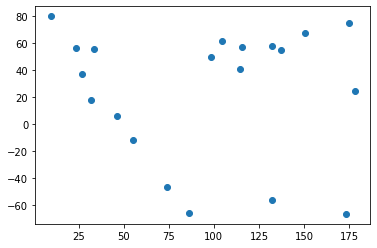

In [48]:
import matplotlib.pyplot as plt
plt.plot(cs.l, cs.b, 'o')

Including observation time and convert to observational `QTable`

In [49]:
from astropy.time import Time

In [50]:
sc = SkyCoord(ra=[40, 70]*u.deg, dec=[0, -20]*u.deg,
              obstime=Time([2000.2, 2010.123], format='decimalyear'))
tab =  sc.to_table()
tab

ra,dec,obstime
deg,deg,
float64,float64,Time
40.0,0.0,2000.2
70.0,-20.0,2010.123


In [51]:
print(tab['obstime'])
print(tab['obstime'].mjd)
print(tab['obstime'].iso)
print(tab['obstime'].fits)

[2000.2   2010.123]
[51617.2   55241.895]
['2000-03-14 04:48:00.000' '2010-02-14 21:28:48.000']
['2000-03-14T04:48:00.000' '2010-02-14T21:28:48.000']


Coordinates: transformation of the reference system

In [52]:
c_icrs = SkyCoord(ra=10.68458*u.degree,
                  dec=41.26917*u.degree,
                  frame='icrs')
c_galactic = c_icrs.galactic  
c_galactic

<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>

In [53]:
c_galactic.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (10.68458, 41.26917)>

Distance between two coordinates

In [54]:
c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, frame='icrs')
c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, frame='fk5')
c1.separation(c2)  # Differing frames handled correctly  

<Angle 1.40453359 deg>

Search coordinates by source name

In [55]:
SkyCoord.from_name("PSR J1012+5307")

<SkyCoord (ICRS): (ra, dec) in deg
    (153.1393106, 53.1173746)>

### ⛏ Exercise
Find the separation in arcmin between M51 and the point of the Sky in Galactic Coordinates l=10h25m47.0s and b=+10deg. Be careful setting the coordinate frame of reference.

In [56]:
m51_coord = SkyCoord.from_name("M51")  
point_coord = SkyCoord(l='10h25m47.0s', b=10*u.degree, frame='galactic')
m51_coord, point_coord
print(m51_coord.separation(point_coord).to('arcmin'))

4040.44arcmin


### 🌪 Exercise

- Make a python list with the names of the 110 Messier objects.
- Create a table with their coordinates, as provided by `SkyCoord`.
- Compute the angular separation between M1 and the rest of the objects.
- Find the coordinates of the closest and the furthest Messier object from M1?
- What is the average position of all Messier object coordinates?
- What is the closest Simbad object to that average position? Use `Simbad.query_region` [query region](https://astroquery.readthedocs.io/en/latest/simbad/simbad.html#query-a-region).

In [57]:
from astroquery.simbad import Simbad

names = [f'M{i+1}' for i in range(5)]

m_coord = {}
for name in names:
    print(f'Searching {name} ', end='')
    m_coord[name] = SkyCoord.from_name(name)  

print(m_coord)

Searching M1 Searching M2 Searching M3 Searching M4 Searching M5 {'M1': <SkyCoord (ICRS): (ra, dec) in deg
    (83.63311446, 22.01448714)>, 'M2': <SkyCoord (ICRS): (ra, dec) in deg
    (323.362583, -0.82325)>, 'M3': <SkyCoord (ICRS): (ra, dec) in deg
    (205.548417, 28.377278)>, 'M4': <SkyCoord (ICRS): (ra, dec) in deg
    (245.89675, -26.52575)>, 'M5': <SkyCoord (ICRS): (ra, dec) in deg
    (229.638417, 2.081028)>}


In [58]:
separations = []
for name in names:
    separation = m_coord['M1'].separation(m_coord[name]).deg
    separations.append(separation)
    #print(name, separation)

idx_max = np.argmax(separations)
print(names[idx_max], separations[idx_max])

M4 163.23074754332873


In [59]:

#Simbad.query_region(SkyCoord.from_name("M51")  , radius='1arcsec')[0]['MAIN_ID']

### 🌪 Exercise

- Generate two arrays of 100 values following a pattern, for example a linear, a trigonometric function or a combination of both.
- Add Gaussian noise to those arrays using `np.random.normal`. Use a `sigma` that is conmensurable to the magnitude of the values.
- Generate an array of 100 MJD values.
- Create a `SkyCoord` object combining the first two arrays as coordinates and the third as `obstime`.
- Convert the coordinates to a `QTable` and show the first few rows.
- Plot the projections of R.A., Dec. and obstime


In [60]:
N = 100
ra = np.linspace(0, 1, N)*(-10) + 20 + np.random.normal(0, 0.005, N)
ra = np.sin(np.linspace(0, 6*np.pi, N))*0.5 +10 + np.linspace(0, 5, N)*1 + np.random.normal(0, 0.08, N)
de = np.cos(np.linspace(0, 6*np.pi, N))*0.3 -20 + np.random.normal(0, 0.04, N)
mjds = np.linspace(56400, 56800, N)

sc = SkyCoord(ra=ra*u.deg, dec=de*u.deg,
              obstime=Time(mjds, format='mjd'))
tab2 = sc.to_table()
tab2[0:5]

ra,dec,obstime
deg,deg,
float64,float64,Time
10.038858573298985,-19.76098101065604,56400.0
10.04305446865108,-19.663003217130317,56404.0404040404
10.297449353228664,-19.680487419315636,56408.080808080806
10.396959096393271,-19.70841809706679,56412.121212121216
10.68947222079611,-19.747900321132082,56416.16161616162


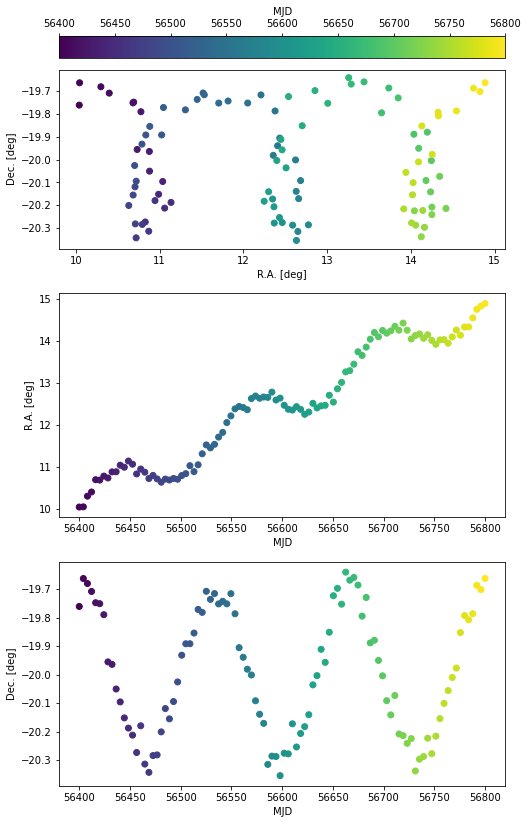

In [61]:
fig, ax = plt.subplots(nrows=3, figsize=(8,14))

l = ax[0].scatter(sc.ra.deg, sc.dec.deg, c=sc.obstime.mjd, marker='o')
ax[1].scatter(sc.obstime.mjd, sc.ra.deg, c=sc.obstime.mjd, marker='o')
ax[2].scatter(sc.obstime.mjd, sc.dec.deg, c=sc.obstime.mjd, marker='o')

ax[0].set_xlabel('R.A. [deg]')
ax[0].set_ylabel('Dec. [deg]')
ax[1].set_xlabel('MJD')
ax[1].set_ylabel('R.A. [deg]')
ax[2].set_xlabel('MJD')
ax[2].set_ylabel('Dec. [deg]')

# Show the color bar
cb = fig.colorbar(l, ax=ax[0], location='top');
cb.set_label('MJD')

# Astroquery
[Astroquery](https://astroquery.readthedocs.io/en/latest/) is a coordinated package of astropy.

It provides easy access to many different [services](https://astroquery.readthedocs.io/en/latest/#available-services), [catalogs](https://astroquery.readthedocs.io/en/latest/#catalogs) and [archives](https://astroquery.readthedocs.io/en/latest/#archives) that follow Virtual Observatory standards. In particular it provides access to Simbad, Vizier, NED, Gaia, [ESASky](https://sky.esa.int/) and many others.

Some [example](https://ioa-coding.github.io/codecorners/2017_10_24_CC02_astroquery.html)

## Vizier Table Discovery

In [62]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1

In [63]:
catalog_list = Vizier.find_catalogs('fermi 4fgl')
['{}: {}'.format(k, v.description) for k, v in catalog_list.items()]

['J/ApJ/887/134: Classification of Fermi blazar cand. from the 4FGL (Kang+, 2019)',
 'J/ApJS/247/33: The Fermi LAT fourth source catalog (4FGL) (Abdollahi+, 2020)']

In [64]:
cat = Vizier.get_catalogs('J/ApJS/247/33')[0]

In [65]:
cat

_4FGL,RAJ2000,DEJ2000,amaj95,bmin95,PA95,Sig,F1000i,e_F1000i,EF100,e_EF100,Mod,PLGam,F50,F100,F300,F1000,F3000,F10000,F30000,VarInd,FGL,Cl1,Assoc1,Flags,LC,Simbad
,deg,deg,deg,deg,deg,,ph/cm2/s,ph/cm2/s,mW / m2,mW / m2,,,ph/cm2/s,ph/cm2/s,ph/cm2/s,ph/cm2/s,ph/cm2/s,ph/cm2/s,ph/cm2/s,,,,,,,
str13,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,str18,str5,str28,int16,str2,str6
J0000.3-7355,0.0983,-73.9220,0.0525,0.0510,-62.70,7.39960,1.7195e-10,3.11e-11,1.9201e-12,3.5205e-13,PowerLaw,2.119125,7.5876e-09,1.5063e-11,4.7872e-10,1.2424e-10,4.5425e-11,1.0336e-11,1.8191e-15,8.664629,,,,0,LC,Simbad
J0001.2+4741,0.3126,47.6859,0.0598,0.0538,-45.90,4.19693,1.4253e-10,3.7062e-11,1.6308e-12,4.4813e-13,PowerLaw,2.198363,7.1512e-11,7.4824e-13,5.593e-10,1.2437e-10,2.5566e-11,3.4768e-12,2.7096e-12,17.288631,,bcu,B3 2358+474,0,LC,Simbad
J0001.2-0747,0.3151,-7.7971,0.0299,0.0285,64.10,22.74844,8.3974e-10,6.2108e-11,9.4402e-12,6.5065e-13,PowerLaw,2.148326,8.4597e-09,6.8728e-09,2.6623e-09,5.6417e-10,2.216e-10,2.711e-11,7.6465e-12,16.869194,3FGL J0001.2-0748,bll,PMN J0001-0746,0,LC,Simbad
J0001.5+2113,0.3815,21.2183,0.0422,0.0389,-60.52,30.66605,9.6793e-10,6.6642e-11,1.926e-11,8.2096e-13,LogParabola,2.680171,6.0761e-08,3.663e-08,7.9707e-09,9.5297e-10,6.2162e-11,7.7393e-15,4.3677e-16,920.677429,3FGL J0001.4+2120,fsrq,TXS 2358+209,0,LC,Simbad
J0001.6-4156,0.4165,-41.9425,0.0692,0.0525,44.09,11.46402,2.8089e-10,3.807e-11,3.3865e-12,4.914e-13,PowerLaw,1.833594,1.0303e-08,2.9368e-09,2.9817e-10,1.5496e-10,8.8553e-11,2.5096e-11,1.855e-11,13.750535,3FGL J0002.2-4152,bcu,2MASS J00013275-4155252,0,LC,Simbad
J0002.1-6728,0.5378,-67.4746,0.0352,0.0311,52.51,11.55818,2.2861e-10,3.4612e-11,2.8218e-12,4.3319e-13,PowerLaw,1.801989,1.9193e-08,7.1023e-10,1.8881e-10,1.4783e-10,5.8441e-11,3.4022e-11,7.8335e-12,10.018329,3FGL J0002.0-6722,bcu,SUMSS J000215-672653,0,LC,Simbad
J0002.1+6721,0.5419,67.3578,0.1200,0.0860,-82.10,6.70188,6.9245e-10,1.079e-10,6.1846e-12,1.6246e-12,LogParabola,2.600463,1.6352e-08,8.817e-09,2.2629e-09,6.2426e-10,6.6587e-11,2.0912e-14,1.2539e-16,6.027517,,unk,1RXS J000209.4+672503,1,LC,Simbad
J0002.8+6217,0.7201,62.2905,0.0268,0.0256,3.84,27.66865,2.5688e-09,1.2585e-10,1.8611e-11,1.5058e-12,PLSuperExpCutoff,2.473127,2.8459e-11,7.7343e-09,7.7631e-09,2.1263e-09,3.2921e-10,1.7073e-12,1.6273e-15,4.701815,3FGL J0002.6+6218,PSR,PSR J0002+6216,0,LC,Simbad


Good! Note that the tables contain unit information, so there will be no ambiguity when using the data from Vizier tables. But we can get more information, in particular the description of each column.

In [66]:
cat.info

<Table length=5065>
  name    dtype    unit    format                                                    description                                                   n_bad
-------- ------- -------- -------- --------------------------------------------------------------------------------------------------------------- -----
   _4FGL   str13                                                                           The 4FGL name (JHHMM.m+DDMM[c/e/i/s]) (Source_Name) (1)     0
 RAJ2000 float64      deg  {:8.4f}                                                                               Right ascension (J2000) (RAJ2000)     0
 DEJ2000 float64      deg  {:8.4f}                                                                                   Declination (J2000) (DEJ2000)     0
  amaj95 float32      deg  {:7.4f}                                 [0.006/1.3]? Long radius of error ellipse at 95% confidence (Conf_95_SemiMajor)    76
  bmin95 float32      deg  {:7.4f}                            

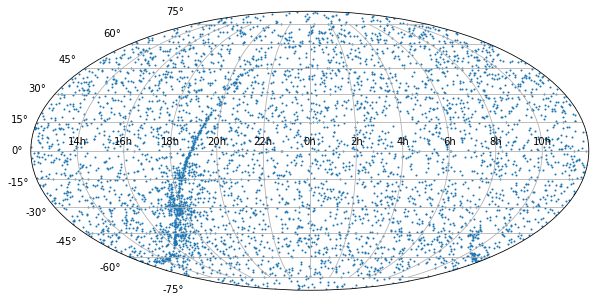

In [67]:
from astropy.coordinates import SkyCoord

ra_deg = Angle(cat['RAJ2000'])
de_deg = Angle(cat['DEJ2000'])
ra_deg = ra_deg.wrap_at('180d')

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra_deg.rad, de_deg.rad, s=1)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

### ⛏ Exercise
- Search Vizier catalogs related to the keyword `carmenes` (or any other you are interested).
- Select the ID of the catalog named "324 CARMENES M dwarfs velocities" and download the first table.
- Use `info` to find out the name of the columns with the coordinates.
- Find out the minimum, maximum and mean period in the sources in this catalog.
- Make an all-sky plot of the sources in this catalog.

In [68]:
catalog_list = Vizier.find_catalogs('carmenes')
['{}: {}'.format(k, v.description) for k, v in catalog_list.items()]

['J/ApJ/900/42: CARMENES obs. of the binary system LB-1 (Liu+, 2020)',
 'J/A+A/577/A128: CARMENES input catalogue of M dwarfs. I (Alonso-Floriano+, 2015)',
 'J/A+A/597/A47: CARMENES input catalogue of M dwarfs II (Cortes-Contreras+ 2017)',
 'J/A+A/609/A117: CARMENES radial velocity curves of 7 M-dwarf (Trifonov+, 2018)',
 'J/A+A/609/L5: HD147379 b velocity curve (Reiners+, 2018)',
 'J/A+A/612/A49: 324 CARMENES M dwarfs velocities (Reiners+, 2018)',
 'J/A+A/614/A76: CARMENES input catalogue of M dwarfs. III. (Jeffers+, 2018)',
 'J/A+A/614/A122: Radial-velocity of CARMENES M dwarfs (Tal-Or+, 2018)',
 'J/A+A/615/A6: Photospheric parameters of CARMENES stars (Passegger+, 2018)',
 'J/A+A/618/A115: HD 147379 radial velocities (Kaminski+, 2018)',
 'J/A+A/619/A32: CARMENES SB2 orbital parameters (Baroch+, 2018)',
 'J/A+A/620/A171: Radial velocities of GJ 3779 and GJ 1265 (Luque+, 2018)',
 'J/A+A/621/A49: K2-18 HARPS time-series (Cloutier+, 2019)',
 'J/A+A/621/A126: CARMENES input catalogue of 

In [69]:
carmenes = Vizier.get_catalogs('J/A+A/612/A49')[0]

In [70]:
carmenes

Seq,ID,GJ,Name,SpType,Jmag,Mass,RV,Per,r_Per,l_vsini,vsini,l_Pvsini,Pvsini,l_i,i,logLHa_Lbol,SimbadName,_RA,_DE
,,,,,mag,Msun,km / s,d,,,km / s,,d,,deg,[-],,deg,deg
int16,str11,str6,str23,str4,float32,float32,float64,float32,str6,str1,float32,str1,float32,str2,int16,float32,str23,float64,float64
1,J00051+457,2,GJ 2,M1.0,6.70,0.56,-0.392,--,,<,2.0,>,13.30,,--,--,GJ 2,1.29537,45.78657
2,J00067-075,1002,GJ 1002,M5.5,8.32,0.11,-40.058,--,,<,2.0,>,3.50,,--,-4.83,GJ 1002,1.67999,-7.53806
3,J00162+198E,1006B,LP 404-062,M4.0,8.89,0.30,-1.457,104.00,Irw11,<,2.0,>,7.40,<=,90,--,LP 404-062,4.06730,19.86402
4,J00183+440,15A,GX And,M1.0,5.25,0.45,11.671,--,,<,2.0,>,10.50,,--,--,GX And,4.59535,44.02295
5,J00184+440,15B,GQ And,M3.5,6.79,0.16,10.876,--,,<,2.0,>,4.60,,--,--,GQ And,4.60760,44.02725
6,J00286-066,1012,GJ 1012,M4.0,8.04,0.39,-12.531,--,,<,2.0,>,9.10,,--,--,GJ 1012,7.16444,-6.66366
7,J00389+306,26,Wolf 1056,M2.5,7.45,0.47,-0.499,--,,<,2.0,>,11.10,,--,--,Wolf 1056,9.74602,30.61622
8,J00570+450,,G 172-030,M3.0,8.10,0.39,6.396,--,,<,2.0,>,9.30,,--,--,G 172-030,14.26122,45.08605


In [71]:
carmenes.info()

<Table length=324>
    name     dtype   unit   format                             description                             n_bad
----------- ------- ------ ------- ------------------------------------------------------------------- -----
        Seq   int16                                                                  Sequential number     0
         ID   str11                                                                   ID (JHHMMm+DDmA)     0
         GJ    str6                                                                            GJ name     0
       Name   str23                                                                               Name     0
     SpType    str4                                                                   MK spectral type     0
       Jmag float32    mag {:5.2f}                                                         J magnitude     0
       Mass float32   Msun {:5.2f}                                                                Mass     0


In [72]:
carmenes.info('stats')

<Table length=324>
    name      mean     std      min      max   n_bad
----------- -------- -------- -------- ------- -----
        Seq    162.5  93.5303        1     324     0
         ID       --       --       --      --     0
         GJ       --       --       --      --     0
       Name       --       --       --      --     0
     SpType       --       --       --      --     0
       Jmag  7.81867  1.18761      4.2   11.35     0
       Mass 0.369877 0.168519     0.07    0.74     0
         RV -3.34948  31.2111 -120.236 105.798     0
        Per  41.0267  46.5482     0.27   165.1   261
      r_Per       --       --       --      --     0
    l_vsini       --       --       --      --     0
      vsini  4.56543  8.11359        2    59.8     0
   l_Pvsini       --       --       --      --     0
     Pvsini  8.02358  4.34176     0.09    16.1     0
        l_i       --       --       --      --     0
          i  80.4531  18.7316       18      90   260
logLHa_Lbol -4.03627 0.4190

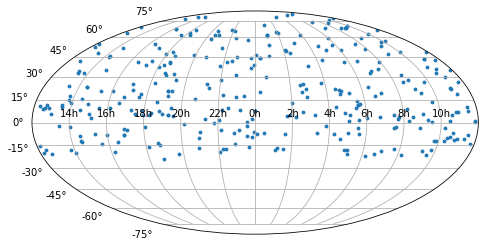

In [73]:
from astropy.coordinates import SkyCoord

ra_deg = Angle(carmenes['_RA'])
de_deg = Angle(carmenes['_DE'])
ra_deg = ra_deg.wrap_at('180d')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra_deg.rad, de_deg.rad, s=8)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

## Query a Simbad object

In [74]:
from astroquery.vizier import Vizier
result = Vizier.query_object("NGC 6670")
print(result)

TableList with 200 tables:
	'0:I/252/out' with 8 column(s) and 32 row(s) 
	'1:I/254/out' with 10 column(s) and 4 row(s) 
	'2:I/259/tyc2' with 10 column(s) and 1 row(s) 
	'3:I/261/fonac' with 9 column(s) and 1 row(s) 
	'4:I/267/out' with 16 column(s) and 48 row(s) 
	'5:I/271/out' with 11 column(s) and 28 row(s) 
	'6:I/275/ac2002' with 9 column(s) and 1 row(s) 
	'7:I/280B/ascc' with 12 column(s) and 1 row(s) 
	'8:I/284/out' with 14 column(s) and 72 row(s) 
	'9:I/294A/ucac2bss' with 12 column(s) and 1 row(s) 
	'10:I/297/out' with 19 column(s) and 75 row(s) 
	'11:I/305/out' with 11 column(s) and 68 row(s) 
	'12:I/312/sample' with 13 column(s) and 3 row(s) 
	'13:I/317/sample' with 13 column(s) and 63 row(s) 
	'14:I/319/xpm' with 25 column(s) and 23 row(s) 
	'15:I/322A/out' with 24 column(s) and 7 row(s) 
	'16:I/324/igsl3' with 18 column(s) and 61 row(s) 
	'17:I/329/urat1' with 16 column(s) and 35 row(s) 
	'18:I/337/gaia' with 14 column(s) and 47 row(s) 
	'19:I/337/tgas' with 20 column(s) an

## Quick access to data from the Gaia catalog

The library we will use to get Gaia data is [Astroquery](https://astroquery.readthedocs.io/en/latest/). Astroquery provides `Gaia`, which is an [object that represents a connection to the Gaia database](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html).

We can connect to the Gaia database like this:

In [10]:
from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = 50

We can easily query the Gaia catalog using the `astroquery` function `Gaia.query_object_async`, which can send query jobs to the Gaia TAP+ service. Note that the filtering options in this function are very limited, so a query may have too many results to handle. Verify your query with a low number of the parameter `Gaia.ROW_LIMIT` first. For full query functionality we should used the [Astronomical Data Query Language (ADQL)](https://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html), which we will use in Session 3. For the moment the simple query is enough for our purposes.

In [11]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

To do a basic query on the *Gaia* catalogue we just need a pointing centre and the (width, height), or the radius, of the region of interest. This is a clear case where you could build a python function to retrieve data based only on those four parameters.

In [12]:
sgra_coord = SkyCoord.from_name("Sgr A*")
search_radius = 50*u.arcsec

sgra_coord.to_string('hmsdms')

'17h45m40.0359888s -29d00m28.169892s'

In [13]:
# Run the actual query to the catalogue
gaia_sgra = Gaia.query_object_async(coordinate=sgra_coord,
                                    radius=search_radius, 
                                    columns=['ra','dec'])

HTTPError: OK

In [ ]:
ra_relative  = gaia_sgra['ra'].to(u.arcsec) - sgra_coord.ra
dec_relative = gaia_sgra['dec'].to(u.arcsec) - sgra_coord.dec


plt.plot(ra_relative, dec_relative, 'ok')
plt.plot(0, 0, '+', ms=20)

### ✨ Exercise

- Define the central coordinates of the cluster, `cluster_coord` of interest R.A. 130.025 deg and Dec. 19.98333 deg.
- Define the variable `width_deg` and `height_deg` to be 3 and 2 degrees, respectively.
- Create a table `data0` using `Gaia.query_object_async` and setting the variables `coordinate`, `width`, `height` and `columns`. The variable columns is defined with:
```
columns = ['ra','dec','ra_error','dec_error','parallax','parallax_error','parallax_over_error','pmra','pmra_error','pmdec','pmdec_error','matched_observations','phot_g_mean_flux','phot_g_mean_flux_error','phot_g_mean_mag','phot_bp_mean_flux','phot_bp_mean_flux_error','phot_bp_mean_mag','phot_rp_mean_flux','phot_rp_mean_flux_error','phot_rp_mean_mag','bp_rp','bp_g','g_rp','radial_velocity','radial_velocity_error','teff_val','radius_val']
```

In [ ]:
columns = ['ra','dec','ra_error','dec_error','parallax','parallax_error','parallax_over_error','pmra','pmra_error','pmdec','pmdec_error','matched_observations','phot_g_mean_flux','phot_g_mean_flux_error','phot_g_mean_mag','phot_bp_mean_flux','phot_bp_mean_flux_error','phot_bp_mean_mag','phot_rp_mean_flux','phot_rp_mean_flux_error','phot_rp_mean_mag','bp_rp','bp_g','g_rp','radial_velocity','radial_velocity_error','teff_val','radius_val']

In [ ]:
cluster_coord = SkyCoord(ra= 130.025,
                         dec=19.98333,
                         unit=(u.deg, u.deg),
                         frame='icrs')
width_deg = 3.0*u.deg
height_deg = 3.0*u.deg

print(cluster_coord.to_string('decimal'))
print(width_deg, height_deg)

In [ ]:
# Run the actual query to the catalogue
data0 = Gaia.query_object_async(coordinate = cluster_coord,
                                width   = width_deg,
                                height  = height_deg,
                                columns = columns)

In [ ]:
data0

In [ ]:
data0.write('../data/data0.ecsv', format='ascii.ecsv', overwrite=False)

# Conclusion. In future episodes...

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(14,8))
ax.scatter(data0['ra'], data0['dec'], s=data0['phot_g_mean_flux']/1e5);
ax.set_aspect('equal')

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');


In [ ]:
ra0 = 130.025
de0 = 19.98333
w = 3
h = 2

# Define the region to query
center_coord = SkyCoord(ra=ra0,
                        dec=de0,
                        unit=(u.degree, u.degree),
                        frame='icrs')
width_deg  = w*u.deg
height_deg = h*u.deg

Here we also include the Jupyter Magic `%time` that will report the execution time of a particular line of code to run. The Magic `%%time` could also be used to report the execution time of the whole cell.

In [ ]:
data0

### ⛏ Exercise
Make a query to retireve only the Right Ascension and Declination and their uncertainties. Store the results in table `results3` and print the table

In [ ]:
%time results3 = Gaia.query_object_async(coordinate=center_coord, width=width_deg, height=height_deg, columns=['ra', 'dec'])

# Conclusion. In future episodes...

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(14,8))
ax.scatter(data0['ra'], data0['dec'], s=data0['phot_g_mean_flux']/1e5);
ax.set_aspect('equal')

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');


Let's save our data for the next session

TBD: select only some columns

In [ ]:
data0.write('../data/data0.ecsv', format='ascii.ecsv', overwrite=False)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (18.0, 10.0)
from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = -1

import astropy.units as u
from astropy.coordinates import SkyCoord

In [3]:
print(Gaia.MAIN_GAIA_TABLE)

None


In [81]:
ra0 = 130.025
de0 = 19.98333
w = 3
h = 2

# Define the region to query
coord = SkyCoord(ra=ra0, dec=de0, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(w, u.deg)
height = u.Quantity(h, u.deg)

# Run the actual query to the catalogue
#%time r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

In [82]:
catalog_list = Vizier.find_catalogs('edr3')
['{}: {}'.format(k, v.description) for k, v in catalog_list.items()]

['I/350: Gaia EDR3 (Gaia Collaboration, 2020)',
 'I/352: Distances to 1.47 billion stars in Gaia EDR3 (Bailer-Jones+, 2021)',
 'I/354: StarHorse2, Gaia EDR3 photo-astrometric distances (Anders+, 2022)',
 'J/ApJS/254/42: Hipparcos-Gaia (EDR3) Catalog of Accelerations (Brandt, 2021)',
 'J/A+A/645/L8: Parallaxes & proper motions of OB stars from Gaia EDR3 (Xu+, 2021)',
 'J/A+A/649/A109: Radial velocities of 4 eclipsing binaries (Graczyk+, 2021)',
 'J/A+A/650/A182: Homogeneous study of Herbig Ae/Be stars (Guzman-Diaz+, 2021)',
 'J/A+A/651/A64: Position difference vectors and of the jets (Lambert+, 2021)',
 'J/A+A/651/A104: Spiral arms Gaia EDR3 (Poggio+, 2021)',
 'J/A+A/652/A2: rho Oph region revisited with Gaia EDR3 (Grasser+, 2021)',
 'J/A+A/654/A20: Parallax zero-point offset from Gaia EDR3 data (Groenewegen, 2021)',
 'J/A+A/654/A107: Catalogues of Blue Horizontal Branch Stars (Culpan+, 2021)',
 'J/A+A/654/A122: X1 Fornacis cluster DANCe (Galli+, 2021)',
 'J/A+A/656/A51: Planetary nebul

In [84]:
from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiaedr3.gaia_source" # Select early Data Release 3
Gaia.MAIN_GAIA_TABLE = "gaiadr2.gaia_source"  # Reselect Data Release 2, default

In [85]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(0.1, u.deg)
height = u.Quantity(0.1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

r.pprint(max_lines=12, max_width=130)

HTTPError: OK